In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import *

In [2]:
df=pd.read_csv(r"C:\Users\Pulkit\Desktop\Titanic kaggle\train.csv",header=0)

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.describe(include="all")

PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Newell, Miss. Madeleine  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000    891  891.000000      204   
unique         NaN         NaN         NaN    681         NaN      147   
top            NaN         NaN         NaN   1601         NaN  B96 B98   
freq           NaN         NaN         NaN      7         NaN        4   
mean     29.699118    0.523008    0.381594    NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057    NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000    NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000    NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000    NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000    NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000    NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [5]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
df["Age"]=df.Age.fillna(df.Age.mean())

In [7]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [9]:
df.Embarked.isnull().any()

True

In [10]:
#dependent variable : Survived

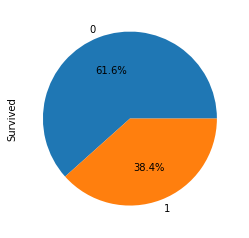

In [11]:
df["Survived"].value_counts().plot(kind="pie",autopct='%1.1f%%')

In [12]:
# Here autopct is mandatory for seeing the percentage


In [13]:
df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [14]:
# we can also draw a heatmap for this

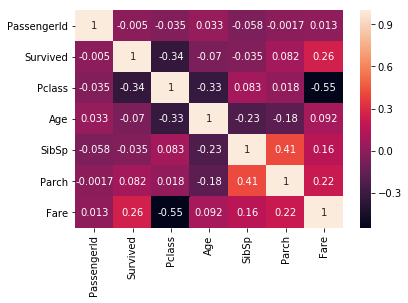

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
df=pd.get_dummies(data=df,columns=["Sex","Embarked"])

In [17]:
df.drop(["PassengerId","Name","Ticket","Cabin","Sex_male"],axis=1,inplace=True)

In [18]:
df.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Embarked_C  \
0         0       3  22.0      1      0   7.2500           0           0   
1         1       1  38.0      1      0  71.2833           1           1   
2         1       3  26.0      0      0   7.9250           1           0   
3         1       1  35.0      1      0  53.1000           1           0   
4         0       3  35.0      0      0   8.0500           0           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [19]:
import seaborn as sns

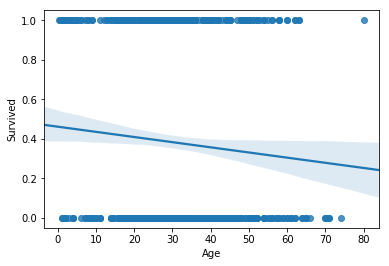

In [20]:
sns.regplot(x="Age",y="Survived",data=df)

In [21]:
df.shape

(891, 10)

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape


(891, 10)

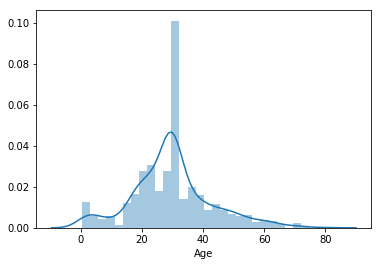

In [24]:
sns.distplot(df["Age"].
             dropna())

In [25]:
from scipy import stats
print("Skewness",stats.skew(df["Age"]))

Skewness 0.4337562902461274


In [26]:
print("Skewness",stats.skew(df["Fare"]))

Skewness 4.7792532923723545


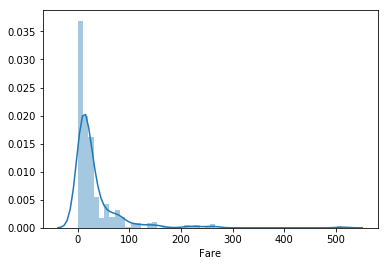

In [27]:
sns.distplot(df["Fare"].dropna())

In [28]:
x_data=df.drop('Survived',axis=1)

In [29]:
y_data=df["Survived"]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=0)

In [31]:
# Now let use try different model for Analysis
from sklearn.metrics import confusion_matrix
z=[]

In [32]:
def data_model(ml_model,x_train,x_test,y_train,y_test):
    model=ml_model
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
   
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    train_model= model.score(x_train, y_train)
                      
    test_model=accuracy_score(y_pred, y_test)
    print('Training Model:',train_model)
    print('Predicted Model:', test_model)
    
    return z.append([ml_model,train_model,test_model])
    

In [33]:
# Now we will use different models to find the best one

In [34]:
data_model(KNeighborsClassifier(),x_train,x_test,y_train,y_test)

[[93 17]
 [31 38]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       110
           1       0.69      0.55      0.61        69

   micro avg       0.73      0.73      0.73       179
   macro avg       0.72      0.70      0.70       179
weighted avg       0.73      0.73      0.72       179

Training Model: 0.7949438202247191
Predicted Model: 0.7318435754189944


In [35]:
data_model(LogisticRegression(),x_train,x_test,y_train,y_test)

[[93 17]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

   micro avg       0.80      0.80      0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Training Model: 0.7991573033707865
Predicted Model: 0.7988826815642458


c:\users\pulkit\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
data_model(svm.SVC(kernel="rbf"),x_train,x_test,y_train,y_test)

[[93 17]
 [38 31]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       110
           1       0.65      0.45      0.53        69

   micro avg       0.69      0.69      0.69       179
   macro avg       0.68      0.65      0.65       179
weighted avg       0.69      0.69      0.68       179

Training Model: 0.8806179775280899
Predicted Model: 0.6927374301675978


c:\users\pulkit\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
data_model(DecisionTreeClassifier(criterion="entropy"),x_train,x_test,y_train,y_test)

[[93 17]
 [23 46]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

   micro avg       0.78      0.78      0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179

Training Model: 0.9817415730337079
Predicted Model: 0.776536312849162


In [38]:
# Now we will see the results on visualization and find out the best algoritm for us

In [39]:
outcomes=pd.DataFrame(z,columns=["Model","Training Model","Predicted Model"])

In [40]:
import seaborn as sns

In [ ]:
# so we can see that deccision tree is best method
#Now we will work on test data

In [43]:
test_df=pd.read_csv(r"C:\Users\Pulkit\Desktop\Titanic kaggle\test.csv")

In [44]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [46]:
test_df=pd.get_dummies(data=test_df,columns=["Sex","Embarked"])

In [47]:
test_df.head()

PassengerId  Pclass                                          Name   Age  \
0          892       3                              Kelly, Mr. James  34.5   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  47.0   
2          894       2                     Myles, Mr. Thomas Francis  62.0   
3          895       3                              Wirz, Mr. Albert  27.0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0   

   SibSp  Parch   Ticket     Fare Cabin  Sex_female  Sex_male  Embarked_C  \
0      0      0   330911   7.8292   NaN           0         1           0   
1      1      0   363272   7.0000   NaN           1         0           0   
2      0      0   240276   9.6875   NaN           0         1           0   
3      0      0   315154   8.6625   NaN           0         1           0   
4      1      1  3101298  12.2875   NaN           1         0           0   

   Embarked_Q  Embarked_S  
0           1           0  
1           0           1  
2           1           0  
3           0           1  
4           0           1

In [48]:
test_df.drop(["Sex_male","Cabin","Ticket","Name"],axis=1,inplace=True)

In [49]:
test_df.head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Embarked_C  \
0          892       3  34.5      0      0   7.8292           0           0   
1          893       3  47.0      1      0   7.0000           1           0   
2          894       2  62.0      0      0   9.6875           0           0   
3          895       3  27.0      0      0   8.6625           0           0   
4          896       3  22.0      1      1  12.2875           1           0   

   Embarked_Q  Embarked_S  
0           1           0  
1           0           1  
2           1           0  
3           0           1  
4           0           1

In [50]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Age             True
SibSp          False
Parch          False
Fare            True
Sex_female     False
Embarked_C     False
Embarked_Q     False
Embarked_S     False
dtype: bool

In [51]:
test_df["Fare"]=test_df["Fare"].fillna(test_df["Fare"].mean())

In [52]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Age             True
SibSp          False
Parch          False
Fare           False
Sex_female     False
Embarked_C     False
Embarked_Q     False
Embarked_S     False
dtype: bool

In [ ]:
#test_df.drop("PassengerId",axis=1,inplace=True)

In [ ]:
#test_df.head()

In [ ]:
#test_df.dropna(subset=["Age"],axis=0,inplace=True)

In [ ]:
#test_df.head()

In [ ]:
#test_df.isnull().any()

In [53]:
test_df["Age"].mean()

30.272590361445783

In [54]:
test_df["Age"]=test_df["Age"].fillna(test_df["Age"].mean())

In [55]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
Sex_female     False
Embarked_C     False
Embarked_Q     False
Embarked_S     False
dtype: bool

In [56]:
test_df.head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Embarked_C  \
0          892       3  34.5      0      0   7.8292           0           0   
1          893       3  47.0      1      0   7.0000           1           0   
2          894       2  62.0      0      0   9.6875           0           0   
3          895       3  27.0      0      0   8.6625           0           0   
4          896       3  22.0      1      1  12.2875           1           0   

   Embarked_Q  Embarked_S  
0           1           0  
1           0           1  
2           1           0  
3           0           1  
4           0           1

In [57]:
model=DecisionTreeClassifier(criterion="entropy")

model.fit(x_train,y_train)

In [58]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
test_df["Survived"]=model.predict(test_df.drop("PassengerId",axis=1))


In [60]:
result=test_df[["PassengerId","Survived"]]

In [61]:
result.to_csv(r"C:\Users\Pulkit\Desktop\Book1.csv",index=False)

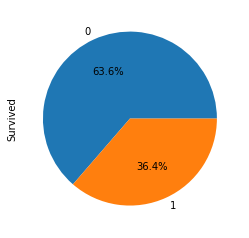

In [62]:
result["Survived"].value_counts().plot(kind="pie",autopct='%1.1f%%')